In [1]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from mgcpy.independence_tests.dcorr import DCorr
from mgcpy.benchmarks.power import power
from mgcpy.benchmarks.simulations import linear_sim, quad_sim, ubern_sim, exp_sim, w_sim

In [2]:
def compute_distance_matrix(data_matrix_X, data_matrix_Y):
    # obtain the pairwise distance matrix for X and Y
    dist_mtx_X = squareform(pdist(data_matrix_X, metric='euclidean'))
    dist_mtx_Y = squareform(pdist(data_matrix_Y, metric='euclidean'))
    return (dist_mtx_X, dist_mtx_Y)

## Test Statistic

## P-value

## Power

In [5]:
dim_range = 20
mcorr_power = []
dcorr_power = []
for d in range(1, dim_range+1):
    mcorr = DCorr(data_matrix_X=np.nan, data_matrix_Y=np.nan, 
                    compute_distance_matrix=compute_distance_matrix, corr_type='mcorr')
    dcorr = DCorr(data_matrix_X=np.nan, data_matrix_Y=np.nan, 
                    compute_distance_matrix=compute_distance_matrix, corr_type='dcorr')
    mcorr_power.append(power(mcorr, quad_sim, num_samples=100, num_dimensions=d))
    dcorr_power.append(power(dcorr, quad_sim, num_samples=100, num_dimensions=d))

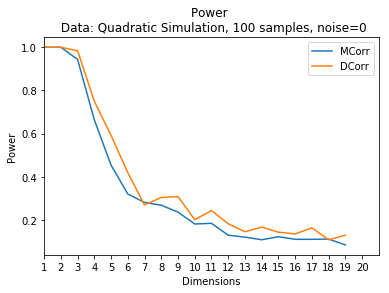

In [6]:
plt.plot(mcorr_power, label='MCorr')
plt.plot(dcorr_power, label='DCorr')
plt.xlabel('Dimensions')
plt.ylabel('Power')
plt.legend()
plt.gca().set_xlim(1, 21)
#plt.gca().get_xaxis().set_major_locator(MaxNLocator(integer=True))
plt.xticks(np.arange(1, len(mcorr_power)+1))
plt.title('Power \n Data: Quadratic Simulation, 100 samples, noise=0')
plt.show()